In [ ]:
import os
os.kill(os.getpid(), 9)

In [2]:
from google.colab import files
from io import BytesIO
from PIL import Image, ImageDraw, ImageEnhance
from skimage import io
import math 
from skimage import img_as_float
import numpy as np
import cv2

uploaded = files.upload()

import matplotlib.pyplot as plt

Saving sp.png to sp (8).png


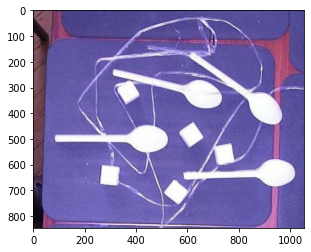

In [3]:
image = io.imread(BytesIO(uploaded['sp.png']))

plt.imshow(image)
plt.show()
plt.close()

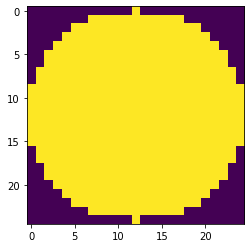

In [4]:
hole_mask = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (25, 25))
plt.imshow(hole_mask)
plt.show()
plt.close()

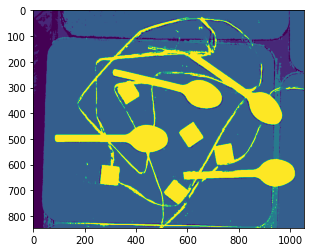

In [5]:
thresh = 128
bin_image = cv2.threshold(image, thresh, 255, cv2.THRESH_BINARY)[1]
bin_image = cv2.cvtColor(bin_image, cv2.COLOR_BGR2GRAY)
plt.imshow(bin_image)
plt.show()
plt.close()

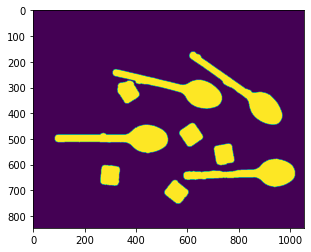

In [6]:
bin_image = cv2.erode(bin_image, hole_mask)
bin_image = cv2.dilate(bin_image, hole_mask)
bin_image[bin_image < 255] = 0
plt.imshow(bin_image)
plt.show()
plt.close()

In [7]:
contours, hierarchy = cv2.findContours(bin_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [8]:
cnt_area = []
for cnt in contours:
    area = cv2.contourArea(cnt)
    cnt_area.append(area)
indices = np.array(cnt_area).argsort()
sorted_area = sorted(cnt_area)

border_val_id = np.argmax(np.diff(sorted_area)) + 1

In [9]:
sugar = indices[:border_val_id]
spoons = indices[border_val_id:]

In [10]:
for i in indices:
    if i in sugar:
        cv2.drawContours(image, contours, i, (0, 255, 0), 3)
    else:
        cv2.drawContours(image, contours, i, (255, 0, 0), 3)

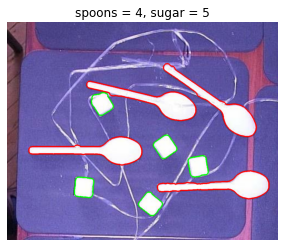

In [11]:
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.title(f'spoons = {len(spoons)}, sugar = {len(sugar)}')
plt.show()